In [3]:
import pandas as pd
from IPython.display import Image

print('Версия pandas:', pd.__version__)

Версия pandas: 2.1.4


# Агрегирование и группировка данных. Часть 1

## Методология split-apply-combine ("разделить-применить-объединить" )

## Свойства и методы объекта Groupby

    План урока
    
    1. Агрегирование (агрегация), агрегирующие функции и агрегированные данные
    2. Методология "split-apply-combine" ("разделить-применить-объединить" )
    3. Объект GroupBy
    4. Атрибут DataFrameGroupBy.groups
    5. Метод get_group()
    6. Метод groupby(). Группировка данных файла tips.csv
        6.1. Определяем три элемента для выполнения операции группировки
        6.2. Передаем несколько названий группирующих столбцов
        6.3. Передаем несколько названий агрегирующих столбцов
        6.4. Метод agg()
     7. Возврат агрегированных данных без индексов строк
        - Аргумент as_index=False
        - Метод reset_index()

## 1. Агрегирование (агрегация), агрегирующие функции и агрегированные данные

_Агрегация данных — это способ преобразования набора данных в одно результирующее значение. Это значение описывает исходный набор данных с точки зрения того, какая именно агрегация была выбрана._

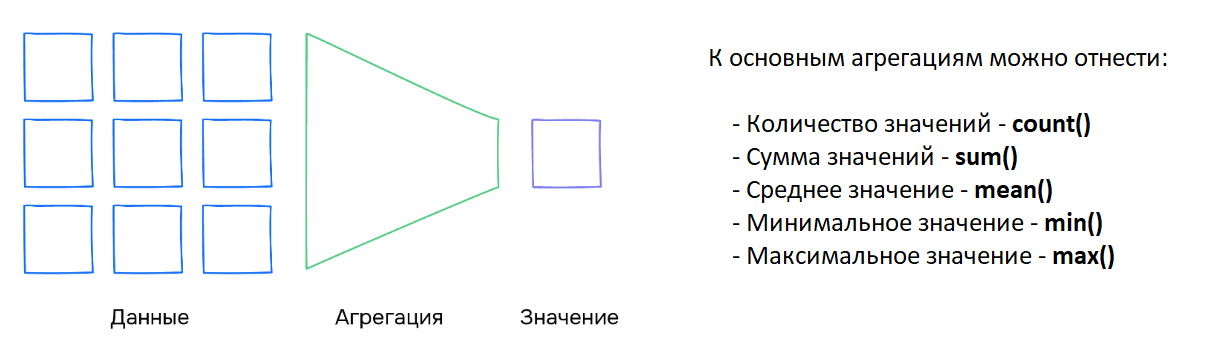

In [4]:
Image('files/aggregation.png')

_Агрегированные данные — это набор нескольких значений, описывающих исходные данные. Агрегированные данные позволяют охарактеризовать данные вне зависимости от их объема в наборе. Чем больше агрегаций, тем точнее._

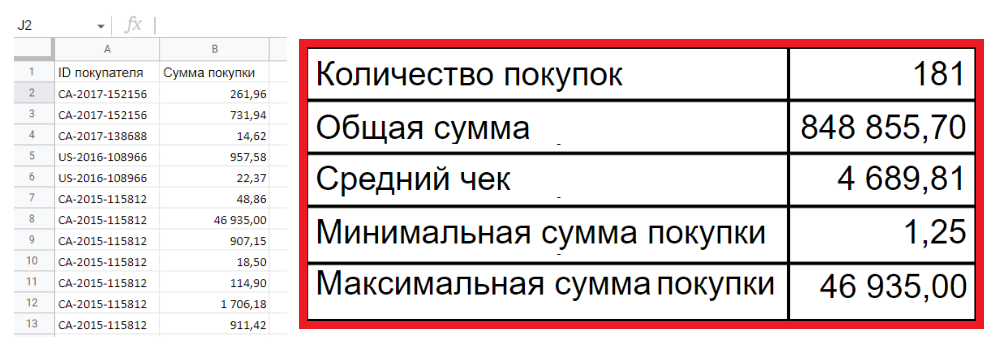

In [5]:
Image('files/agg_table.png')

## 2. Методология "split-apply-combine" ("разделить-применить-объединить" )

_Хэдли Уикхэм новозеландский статистик в 2011 году разработал методологию "Split-Apply-Combine"_

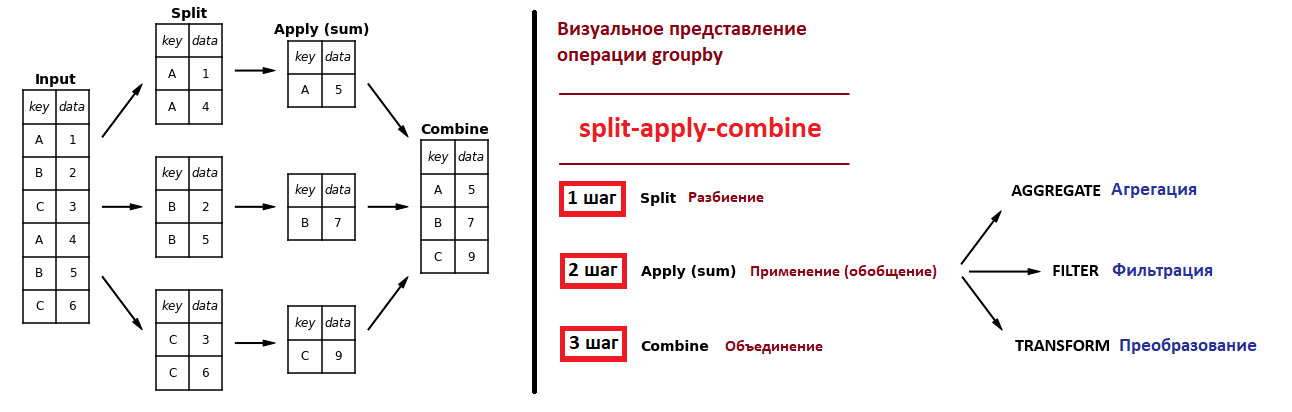

In [6]:
Image('files/groupby_(split-apply-combine).png')

   1. Шаг разбиения включает разделение на части и группировку данных в объекте DataFrame на основе значений заданного ключа.
   2. Шаг применения включает вычисление какой-либо функции, обычно агрегирование, преобразование или фильтрацию в пределах отдельных групп.
   3. На шаге объединения выполняется слияние результатов этих операций в общий результирующий массив.

In [7]:
# создаем DataFrame для последующей демонстрации работы операции groupby

df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],'data': range(1,7)}, columns=['key', 'data'])
df

,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


In [8]:
# 1 шаг - создаем объект DataFrameGroupBy
df.groupby('key')

In [9]:
# 2 и 3 шаг - вызываем метод sum() объекта DataFrameGroupBy
df.groupby('key').sum()

,data
key,
A,5
B,7
C,9


## 3. Объект GroupBy

In [10]:
df

,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


In [11]:
# сохраняем объект GroupBy в переменную gb
gb=df.groupby('key')

## 4. Атрибут DataFrameGroupBy.groups

In [12]:
# получаем сгруппированные данные в виде словаря

print(gb.groups,
      type(gb.groups),
      gb.groups.keys(), 
      gb.groups.values(), 
      sep='\n\n')


{'A': [0, 3], 'B': [1, 4], 'C': [2, 5]}

<class 'pandas.io.formats.printing.PrettyDict'>

dict_keys(['A', 'B', 'C'])

dict_values([Index([0, 3], dtype='int64'), Index([1, 4], dtype='int64'), Index([2, 5], dtype='int64')])


## 5. Метод get_group()

In [13]:
display(gb.get_group('A'),
        gb.get_group('B'),
        gb.get_group('C'))

,key,data
0,A,1
3,A,4


,key,data
1,B,2
4,B,5


,key,data
2,C,3
5,C,6


## 6. Метод .groupby(). Группировка данных файла tips.csv

In [14]:
tips = pd.read_csv('files/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [15]:
tips['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [16]:
tips['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [17]:
tips['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
tips['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [19]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


## 6.1. Определяем три элемента для выполнения операции группировки

    Для выполнения операции groupby рекомендуется с самого начала определить три элемента:
    

    1. группирующий столбец - ('smoker')

    2. агрегирующий столбец - [['tip']]

    3. агрегирующую функцию - .sum()

#### Пример 1.1

In [20]:
tips.groupby('smoker')[['tip']].sum()

,tip
smoker,
No,451.77
Yes,279.81


#### Пример 1.2

In [21]:
tips.groupby('smoker')['tip'].sum()

smoker
No     451.77
Yes    279.81
Name: tip, dtype: float64

#### Различные варианты синтаксиса

_! Доступ по индексу к объекту GroupBy, полученному группировкой объекта DataFrame путем задания имени столбца или массива имен столбцов, имеет тот же эффект, что выборка этих столбцов для агрегирования. Это означает, что_

    tips.groupby('smoker')['tip']
    tips.groupby('smoker')[['tip']]

_просто удобный способ записи вместо:_
    
    tips['tip'].groupby(tips['smoker'])
    tips[['tip']].groupby(tips['smoker'])


## 6.2. Передаем несколько названий группирующих столбцов

#### Пример 2.1

In [22]:
means_1 = tips.groupby(['smoker','time'])['total_bill'].mean()
means_1

smoker  time  
No      Dinner    20.095660
        Lunch     17.050889
Yes     Dinner    21.859429
        Lunch     17.399130
Name: total_bill, dtype: float64

#### Пример 2.2

In [23]:
means_2 = tips.groupby(['smoker','time'])[['total_bill']].mean()
means_2

total_bill
smoker time              
No     Dinner   20.095660
       Lunch    17.050889
Yes    Dinner   21.859429
       Lunch    17.399130

In [24]:
# уникальные пары значений ключей
tips.groupby(['smoker','time']).groups.keys()

dict_keys([('No', 'Dinner'), ('No', 'Lunch'), ('Yes', 'Dinner'), ('Yes', 'Lunch')])

## 6.3. Передаем несколько названий агрегирующих столбцов

#### Пример 3.1

In [25]:
result_1 = tips.groupby(['smoker'])[['total_bill', 'tip']].mean()
result_1

,total_bill,tip
smoker,,
No,19.188278,2.991854
Yes,20.756344,3.008710


## 6.4. Метод agg()

#### Пример 3.2 - Метод agg() - передаем название агрегирующей функции в виде строки

In [26]:
# используя метод agg('mean') получаем тот же результат, что и при использовании метода mean
# tips.groupby(['smoker'])[['total_bill', 'tip']].mean() 

result_2 = tips.groupby(['smoker'])[['total_bill', 'tip']].agg('mean')
result_2

,total_bill,tip
smoker,,
No,19.188278,2.991854
Yes,20.756344,3.008710


#### Пример 3.3 - Метод agg() - передаем несколько названий агрегирующих функций в списке

In [27]:
# для красоты применяем round, чтобы округлить результаты
result_3 = tips.groupby(['smoker'])[['total_bill', 'tip']].agg(['min', 'mean', 'max']).round(2)
result_3

total_bill                tip            
              min   mean    max  min  mean   max
smoker                                          
No           7.25  19.19  48.33  1.0  2.99   9.0
Yes          3.07  20.76  50.81  1.0  3.01  10.0

#### Пример 3.4 - Метод agg() + словарь
    Объект_groupby.agg({'название агрегирующего столбца': 'агрегирующая функция'})

In [28]:
result_4 = tips.groupby(['smoker']).agg({'total_bill':'mean','tip':'mean'})
result_4

,total_bill,tip
smoker,,
No,19.188278,2.991854
Yes,20.756344,3.008710


#### Пример 3.5 - Метод agg() + словарь, где разные агрегирующие столбцы с разными агрегирующими функциями

    Объект_groupby.agg(
    {'название агрегирующего столбца 1': 'агрегирующая функция 1',
    'название агрегирующего столбца 2': 'агрегирующая функция 2'})

In [29]:
result_5 = tips.groupby(['smoker']).agg({'total_bill':'mean','tip':'max'})
result_5

,total_bill,tip
smoker,,
No,19.188278,9.0
Yes,20.756344,10.0


#### Пример 3.6  - Разные агрегирующие столбцы с разными агрегирующими функциями и новыми именами столбцов

    Объект_groupby.agg(
    новое название столбца 1 = pd.NamedAgg(column='агрегирующий столбец 1', aggfunc='агрегирующая функция 1'),
    новое название столбца 2 = pd.NamedAgg(column='агрегирующий столбец 2'', aggfunc='агрегирующая функция 2'))

In [30]:
result_6 = tips.groupby('smoker').agg(
    mean_total_bill = pd.NamedAgg(column='total_bill', aggfunc='mean'),
    max_tip = pd.NamedAgg(column='tip', aggfunc='max'))

result_6

,mean_total_bill,max_tip
smoker,,
No,19.188278,9.0
Yes,20.756344,10.0


## 7. Возврат агрегированных данных без индексов строк

#### Пример 4.1 - Аргумент as_index=False

In [31]:
tips.groupby(['smoker', 'time'])[['total_bill']].mean()

total_bill
smoker time              
No     Dinner   20.095660
       Lunch    17.050889
Yes    Dinner   21.859429
       Lunch    17.399130

In [32]:
tips.groupby(['smoker', 'time'], as_index=False)[['total_bill']].mean()

,smoker,time,total_bill
0,No,Dinner,20.095660
1,No,Lunch,17.050889
2,Yes,Dinner,21.859429
3,Yes,Lunch,17.399130


#### Пример 4.2

In [33]:
tips.groupby(['smoker', 'time'])['total_bill'].mean()

smoker  time  
No      Dinner    20.095660
        Lunch     17.050889
Yes     Dinner    21.859429
        Lunch     17.399130
Name: total_bill, dtype: float64

In [34]:
tips.groupby(['smoker', 'time'], as_index=False)['total_bill'].mean()

,smoker,time,total_bill
0,No,Dinner,20.095660
1,No,Lunch,17.050889
2,Yes,Dinner,21.859429
3,Yes,Lunch,17.399130


#### Пример 4.3 - Используем метод .reset_index()

In [35]:
tips.groupby(['smoker', 'time'])['total_bill'].mean().reset_index()

,smoker,time,total_bill
0,No,Dinner,20.095660
1,No,Lunch,17.050889
2,Yes,Dinner,21.859429
3,Yes,Lunch,17.399130
